# The Task

The dataset contains 28x28 images of hand sign Contains 24,720 images in training set and 2,735 images in the test set
Our task is to classify images into 24 different classes.

# **Explore the data**
Plot the images to better understand the kind of data we are working with 


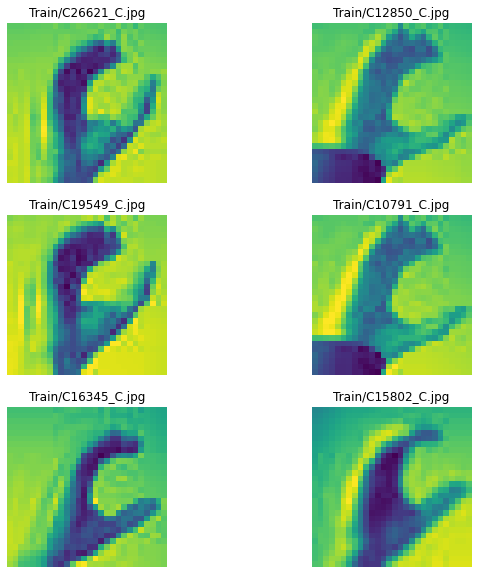

In [1]:
## plot the image from class C as example to plot the images 

from matplotlib import pyplot as plt
import os
import random


_, _, sign_images = next(os.walk('../input/handsignimages/Train/C/'))

### prepare a 4x4 plot (total of 16 images)
fig, ax = plt.subplots(3, 2, figsize=(10,10))

### randomly select and plot an image
for idx, img in enumerate(random.sample(sign_images, 6)):
    img_read = plt.imread('../input/handsignimages/Train/C/'+img)
    ax[int(idx/2), idx%2].imshow(img_read)
    ax[int(idx/2), idx%2].axis('off')
    ax[int(idx/2), idx%2].set_title('Train/C'+img)
plt.show()

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
 #       print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Pre-Process Data
we read the training and validation dataset using ImageDataGenerator 


In [3]:
from keras.preprocessing.image import ImageDataGenerator

training_data_generator = ImageDataGenerator(rescale =1/255, validation_split=0.1)

training_set = training_data_generator.flow_from_directory('../input/handsignimages/Train', target_size =(28, 28), batch_size = 16 , class_mode ='categorical',  subset='training')

validation_set = training_data_generator.flow_from_directory('../input/handsignimages/Train', target_size =(28, 28), batch_size = 16 , class_mode ='categorical',  subset='validation')

print(training_set)
print(training_set)


Found 24720 images belonging to 24 classes.
Found 2735 images belonging to 24 classes.


Building a simple CNN model with Conv2D, Maxpool, Conv2D, maxpool trend 

In [4]:
from random import uniform
from keras.layers.normalization import BatchNormalization


input_size = 28
filter_size = 3
num_filter = 8
maxpool_size = 2
batch_size = 16
epochs = 10
steps_per_epoch = 24720/batch_size

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense


model = Sequential()
model.add(Conv2D(16, (filter_size,filter_size), 
                 input_shape= (input_size,input_size,3), 
                 activation ='relu',
                 padding='same'))

model.add(MaxPooling2D(pool_size=(maxpool_size, maxpool_size),strides=1))


model.add(Conv2D(32, (filter_size,filter_size), 
                 activation='relu', 
                 padding='valid'))


model.add(MaxPooling2D(pool_size=(maxpool_size, maxpool_size),strides=2))


model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(24,activation='softmax'))

 




In [5]:
METRICS = [ 'accuracy']#, 'precision','recall']


model.compile( optimizer= keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=METRICS)

#
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               553080    
_________________________________________________________________
dense_1 (Dense)              (None, 24)                2

In [ ]:
history = model.fit_generator(
training_set,
steps_per_epoch= steps_per_epoch,
epochs= epochs,
validation_data=validation_set,
validation_steps= 2735  // batch_size

)


Epoch 1/10
1545/1545 [==============================] - 83s 54ms/step - loss: 0.4919 - accuracy: 0.8543 - val_loss: 0.0165 - val_accuracy: 0.9985
Epoch 2/10
1545/1545 [==============================] - 34s 22ms/step - loss: 0.0290 - accuracy: 0.9915 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 3/10
1545/1545 [==============================] - 35s 23ms/step - loss: 0.0223 - accuracy: 0.9940 - val_loss: 7.5502e-04 - val_accuracy: 1.0000
Epoch 4/10
1545/1545 [==============================] - 35s 22ms/step - loss: 3.0459e-04 - accuracy: 1.0000 - val_loss: 1.6873e-04 - val_accuracy: 1.0000
Epoch 5/10
 603/1545 [==========>...................] - ETA: 19s - loss: 1.2576e-04 - accuracy: 1.0000

In [ ]:
testing_data_generator = ImageDataGenerator(rescale =1/255)

testing_set = training_data_generator.flow_from_directory('../input/handsignimages/Test', 
                                                          target_size =(28, 28), 
                                                          batch_size = 16 , 
                                                          class_mode ='categorical')

score = model.evaluate_generator(testing_set, steps= len(testing_set))
for idx, metric in enumerate(model.metrics_names):
    print(metric, score[idx])

We can see that there is overfitting for this model as the testing accuracy was 90% 

we will build a nother model with trend Conv2D, Conv2D, Maxpool, Conv2D, Conv2D, maxpool and using Dropout to reduce overfitting

In [ ]:
from random import uniform
from keras.layers.normalization import BatchNormalization


input_size = 28
filter_size = 3
num_filter = 8
maxpool_size = 2
batch_size = 16
epochs = 10
steps_per_epoch = 24720/batch_size

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense


model = Sequential()
model.add(Conv2D(16, (filter_size,filter_size), 
                 input_shape= (input_size,input_size,3), 
                 activation ='relu',
                 padding='same'))
model.add(Conv2D(16, (filter_size,filter_size), 
                 input_shape= (input_size,input_size,3), 
                 activation ='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size=(maxpool_size, maxpool_size),strides=1))
model.add(Dropout(uniform(0, 1)))

model.add(Conv2D(32, (filter_size,filter_size), 
                 activation='relu', 
                 padding='valid'))
model.add(Conv2D(32, (filter_size,filter_size), 
                 activation='relu', 
                 padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(maxpool_size, maxpool_size),strides=2))
model.add(Dropout(uniform(0, 1)))  

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(24,activation='softmax'))

 




In [ ]:
METRICS = [ 'accuracy']#, 'precision','recall']


model.compile( optimizer= keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=METRICS)

#
model.summary()

In [ ]:

history = model.fit_generator(
training_set,
steps_per_epoch= steps_per_epoch,
epochs= epochs,
validation_data=validation_set,
validation_steps= 2735  // batch_size

)


In [ ]:
testing_data_generator = ImageDataGenerator(rescale =1/255)

testing_set = training_data_generator.flow_from_directory('../input/handsignimages/Test', 
                                                          target_size =(28, 28), 
                                                          batch_size = 16 , 
                                                          class_mode ='categorical')

score = model.evaluate_generator(testing_set, steps= len(testing_set))
for idx, metric in enumerate(model.metrics_names):
    print(metric, score[idx])

We can notice that the accuracy of this model has improved 

In [ ]:
from random import uniform
from keras.layers.normalization import BatchNormalization


input_size = 28
filter_size = 3
num_filter = 8
maxpool_size = 2
batch_size = 16
epochs = 10
steps_per_epoch = 24720/batch_size

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense


model = Sequential()
model.add(Conv2D(16, (filter_size,filter_size), 
                 input_shape= (input_size,input_size,3), 
                 activation ='relu',
                 padding='same'))
model.add(Conv2D(16, (filter_size,filter_size), 
                 input_shape= (input_size,input_size,3), 
                 activation ='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size=(maxpool_size, maxpool_size),strides=1))
model.add(Dropout(uniform(0, 1)))

model.add(Conv2D(32, (filter_size,filter_size), 
                 activation='relu', 
                 padding='valid'))
model.add(Conv2D(32, (filter_size,filter_size), 
                 activation='relu', 
                 padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(maxpool_size, maxpool_size),strides=2))
model.add(Dropout(uniform(0, 1)))  

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(24,activation='softmax'))

 


In [ ]:
METRICS = [ 'accuracy']#, 'precision','recall']


model.compile( optimizer= keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=METRICS)

#
model.summary()

In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=2)

history = model.fit_generator(
training_set,
steps_per_epoch= steps_per_epoch,
epochs= epochs,
validation_data=validation_set,
validation_steps= 2735  // batch_size,
callbacks=[es]
)
#callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler]

In [ ]:
testing_data_generator = ImageDataGenerator(rescale =1/255)

testing_set = training_data_generator.flow_from_directory('../input/handsignimages/Test', 
                                                          target_size =(28, 28), 
                                                          batch_size = 16 , 
                                                          class_mode ='categorical')

In [ ]:
score = model.evaluate_generator(testing_set, steps= len(testing_set))
for idx, metric in enumerate(model.metrics_names):
    print(metric, score[idx])

Now we try a nother model using Conv2D, pool,Conv2D,pool, Conv2D, pool with dropout and BatchNormalization

In [ ]:
input_size = 28
filter_size = 3
num_filter = 8
maxpool_size = 2
batch_size = 16
epochs = 10
steps_per_epoch = 24720/batch_size

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense


model = Sequential()
model.add(Conv2D(16, (filter_size,filter_size), 
                 input_shape= (input_size,input_size,3), 
                 activation ='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size=(maxpool_size, maxpool_size),strides=2))


model.add(Conv2D(32, (filter_size,filter_size), 
                 input_shape= (input_size,input_size,3), 
                 activation ='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size=(maxpool_size, maxpool_size),strides=2))
model.add(Dropout(uniform(0, 1)))  

model.add(Conv2D(64, (filter_size,filter_size), 
                 activation='relu', 
                 padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(maxpool_size, maxpool_size),strides=2))
model.add(Dropout(uniform(0, 1)))  

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(24,activation='softmax'))


In [ ]:
METRICS = [ 'accuracy']#, 'precision','recall']


model.compile( optimizer= keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=METRICS)

#
model.summary()

we will use EarlyStopping 

In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=2)

history = model.fit_generator(
training_set,
steps_per_epoch= steps_per_epoch,
epochs= epochs,
validation_data=validation_set,
validation_steps= 2735  // batch_size,
callbacks=[es]
)


In [ ]:
testing_data_generator = ImageDataGenerator(rescale =1/255)

testing_set = training_data_generator.flow_from_directory('../input/handsignimages/Test', 
                                                          target_size =(28, 28), 
                                                          batch_size = 16 , 
                                                          class_mode ='categorical')

In [ ]:
score = model.evaluate_generator(testing_set, steps= len(testing_set))
for idx, metric in enumerate(model.metrics_names):
    print(metric, score[idx])